<a href="https://colab.research.google.com/github/reshmanair01/Dissertation/blob/main/SarcasmIronyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the datasets

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
product_data = pd.read_csv('product_company_tweet.csv', encoding='ISO-8859-1')
sarcasm_data = pd.read_csv('tweet_sarcasm.csv')

In [5]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
product_data.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion


In [7]:
sarcasm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
sarcasm_data.head(2)

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative


# Pre-Processing

In [9]:
# Add a new column to each dataframe to specify the context
product_data['context'] = 'product'
sarcasm_data['context'] = 'general'

In [10]:
product_data.head(2)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,context
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,product
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,product


In [11]:
# Merge the two dataframes
merged_data = pd.concat([product_data, sarcasm_data])

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90501 entries, 0 to 81407
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 3   context                                             90501 non-null  object
 4   tweets                                              81408 non-null  object
 5   class                                               81408 non-null  object
dtypes: object(6)
memory usage: 4.8+ MB


In [13]:
merged_data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,context,tweets,class
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,product,NaN,NaN
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,product,NaN,NaN
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,product,NaN,NaN
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,product,NaN,NaN
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,product,NaN,NaN


In [14]:
# Merge the two dataframes
merged_data = pd.concat([product_data, sarcasm_data])

# Fill missing values with empty strings
merged_data['tweet_text'].fillna('', inplace=True)
merged_data['tweets'].fillna('', inplace=True)

# Generate the 'all_text' column
merged_data['all_text'] = merged_data['tweet_text'] + ' ' + merged_data['tweets']

# Make sure to shuffle your data if needed
merged_data = merged_data.sample(frac=1).reset_index(drop=True)

In [15]:
merged_data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,context,tweets,class,all_text
0,,NaN,NaN,general,"Boy, Buster Olney really knows how to ask some...",figurative,"Boy, Buster Olney really knows how to ask som..."
1,,NaN,NaN,general,#irony #ignorance #fuckyou http://t.co/3oyIzf5X1l,irony,#irony #ignorance #fuckyou http://t.co/3oyIzf...
2,,NaN,NaN,general,@thetwerkinggirl U see UK govt plans to spend ...,figurative,@thetwerkinggirl U see UK govt plans to spend...
3,Regardless of keyword - Google thinks local. #...,NaN,I can't tell,product,,NaN,Regardless of keyword - Google thinks local. #...
4,,NaN,NaN,general,@SadHappyAmazing And they're the bad guys. #irony,irony,@SadHappyAmazing And they're the bad guys. #i...


In [16]:
# checking null values in all_text because it is having all tweets from product and sarcasm dataset
merged_data['all_text'].isna().sum()

0

In [17]:
merged_data['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array([nan, "I can't tell", 'No emotion toward brand or product',
       'Positive emotion', 'Negative emotion'], dtype=object)

In [18]:
merged_data['class'].unique()

array(['figurative', 'irony', nan, 'sarcasm', 'regular'], dtype=object)

In [19]:
num_nan = merged_data['class'].isna().sum()
print(f"There are {num_nan} 'nan' values in the 'class' column.")

There are 9093 'nan' values in the 'class' column.


In [20]:
nan_rows = merged_data[merged_data['class'].isna()]
print(nan_rows)

                                              tweet_text  \
3      Regardless of keyword - Google thinks local. #...   
6      #Apple guys screaming and running by line to o...   
15     Chris Sacca Tweets Out A Fake #SXSW Beta Invit...   
19     Join actsofsharing.com tonight.  the person wi...   
22     The end of the line is one block away from the...   
...                                                  ...   
90463  RT @mention if you were at the #pepsicostage y...   
90484  new job at Apple? ÛÏ@mention Met the team tha...   
90485  RT @mention RT @mention Google to Launch Major...   
90496  RT @mention &lt;10 minute line for ipad 2 at t...   
90499  Great session by @mention on iPad design. Good...   

       emotion_in_tweet_is_directed_at  \
3                                  NaN   
6                                  NaN   
15                                 NaN   
19                                iPad   
22                                 NaN   
...                        

In [21]:
regular_rows = merged_data[merged_data['class'] == 'regular']
print(regular_rows) ## Filling regular on all the classes with nan values because all are related to product category

      tweet_text emotion_in_tweet_is_directed_at  \
11                                           NaN   
17                                           NaN   
20                                           NaN   
38                                           NaN   
42                                           NaN   
...          ...                             ...   
90480                                        NaN   
90482                                        NaN   
90487                                        NaN   
90491                                        NaN   
90492                                        NaN   

      is_there_an_emotion_directed_at_a_brand_or_product  context  \
11                                                   NaN  general   
17                                                   NaN  general   
20                                                   NaN  general   
38                                                   NaN  general   
42                            

## Data Cleaning

In [22]:
import re

In [23]:
# Based on the above result fro column 'is_there_an_emotion_directed_at_a_brand_or_product'
# replacing {'nan','I can't tell'} with 'No emotion toward brand or product'

# Fill 'nan' values with 'No emotion toward brand or product'
merged_data['is_there_an_emotion_directed_at_a_brand_or_product'].fillna('No emotion toward brand or product', inplace=True)

# Replace "I can't tell" values with 'No emotion toward brand or product'
merged_data['is_there_an_emotion_directed_at_a_brand_or_product'].replace("I can't tell", 'No emotion toward brand or product', inplace=True)

In [24]:
## Filling regular on all the classes with nan values because all are related to product category
# Replace 'nan' values with 'regular'
merged_data['class'].fillna('regular', inplace=True)

In [25]:
# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Apply the function to your text data
merged_data['all_text'] = merged_data['all_text'].apply(remove_urls)

In [26]:
import re

# Function to remove hashtags
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Apply the function to your text data
merged_data['all_text'] = merged_data['all_text'].apply(remove_hashtags)

In [27]:
merged_data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,context,tweets,class,all_text
0,,NaN,No emotion toward brand or product,general,"Boy, Buster Olney really knows how to ask some...",figurative,"Boy, Buster Olney really knows how to ask som..."
1,,NaN,No emotion toward brand or product,general,#irony #ignorance #fuckyou http://t.co/3oyIzf5X1l,irony,
2,,NaN,No emotion toward brand or product,general,@thetwerkinggirl U see UK govt plans to spend ...,figurative,@thetwerkinggirl U see UK govt plans to spend...
3,Regardless of keyword - Google thinks local. #...,NaN,No emotion toward brand or product,product,,regular,Regardless of keyword - Google thinks local.
4,,NaN,No emotion toward brand or product,general,@SadHappyAmazing And they're the bad guys. #irony,irony,@SadHappyAmazing And they're the bad guys.


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

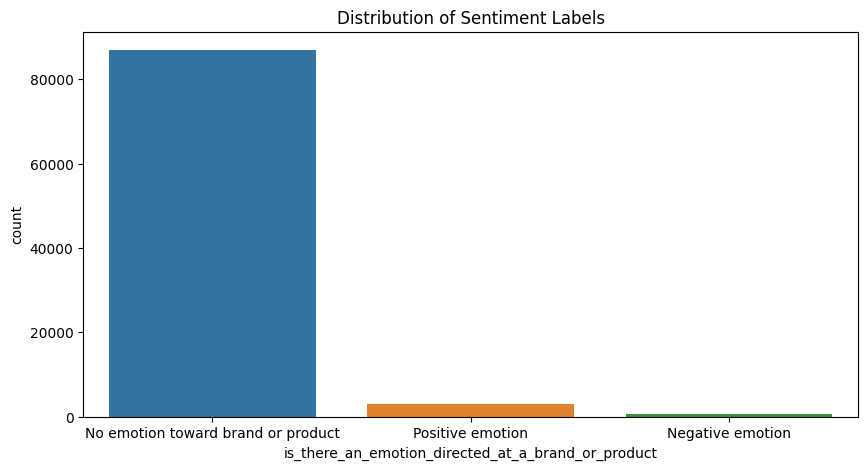

In [ ]:
# Plot for sentiment labels
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_data, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Distribution of Sentiment Labels')
plt.show()

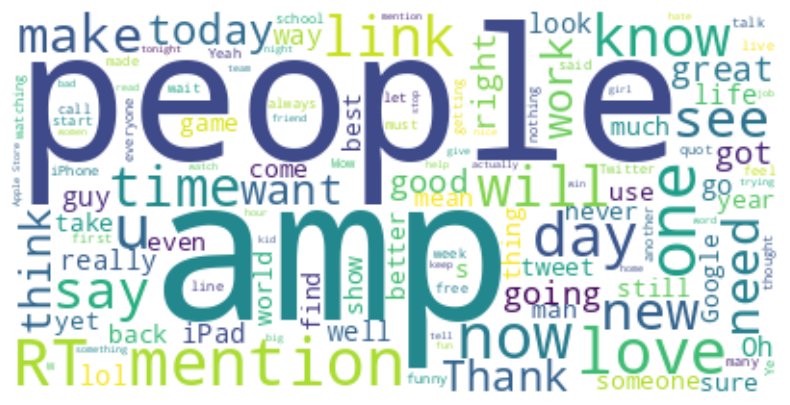

In [ ]:
## Checking the most common words list
# Combine all text into one big text
text = ' '.join(text for text in merged_data['all_text'])

# Create a word cloud
wordcloud = WordCloud(background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90501 entries, 0 to 90500
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          90501 non-null  object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  90501 non-null  object
 3   context                                             90501 non-null  object
 4   tweets                                              90501 non-null  object
 5   class                                               90501 non-null  object
 6   all_text                                            90501 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


# Preparing data for modeling

### Text Normalization

In [ ]:
# Convert to lowercase
merged_data['all_text'] = merged_data['all_text'].str.lower()

# Remove punctuation
merged_data['all_text'] = merged_data['all_text'].str.replace('[^\w\s]','')

<ipython-input-37-94e8907f5e54>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_data['all_text'] = merged_data['all_text'].str.replace('[^\w\s]','')


# Model

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import MobileBertTokenizer

tokenizer = MobileBertTokenizer.from_pretrained('google/mobilebert-uncased')

In [ ]:
# Tokenize the text and create input IDs
input_ids = [tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True) for text in merged_data['all_text']]

In [ ]:
# Create attention masks
attention_masks = [[1] * len(input_id) for input_id in input_ids]

In [ ]:
# Pad the sequences
input_ids = pad_sequences(input_ids, maxlen=512, dtype='int32', padding='post', truncating='post', value=0)
attention_masks = pad_sequences(attention_masks, maxlen=512, dtype='int32', padding='post', truncating='post', value=0)

In [ ]:
print("Shape of input_ids:", input_ids.shape)
print("Shape of attention_masks:", attention_masks.shape)

Shape of input_ids: (90501, 512)
Shape of attention_masks: (90501, 512)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Create a label encoder for 'context'
le_context = LabelEncoder()
context_encoded = le_context.fit_transform(merged_data['context'])

# Create a label encoder for 'class'
le_class = LabelEncoder()
class_encoded = le_class.fit_transform(merged_data['class'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `context_encoded` and `class_encoded` are your encoded labels
labels = list(zip(context_encoded, class_encoded))

# Split the data into training and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=42, test_size=0.1)

# Separate the context and class labels
train_context, train_class = zip(*train_labels)
validation_context, validation_class = zip(*validation_labels)

In [ ]:
from transformers import TFMobileBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Bidirectional, LSTM
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

# Define the inputs
input_ids = Input(shape=(512,), dtype='int32')
attention_masks = Input(shape=(512,), dtype='int32')

# Load the MobileBERT model
bert_model = TFMobileBertModel.from_pretrained('google/mobilebert-uncased')

# Pass the inputs through the BERT model
bert_output = bert_model([input_ids, attention_masks])[0]

# Add a BiLSTM layer
lstm_output = Bidirectional(LSTM(128, return_sequences=False))(bert_output)

# Add dropout for regularization
lstm_output = Dropout(0.1)(lstm_output)

# Add a Dense layer for each classification task
context_output = Dense(len(le_context.classes_), activation='softmax', name='context_output')(lstm_output)
class_output = Dense(len(le_class.classes_), activation='softmax', name='class_output')(lstm_output)

# Define the model
model = Model(inputs=[input_ids, attention_masks], outputs=[context_output, class_output])

from transformers import AdamWeightDecay, get_cosine_schedule_with_warmup

# Set up the learning rate schedule
initial_learning_rate = 2e-5
decay_steps = 10000
decay_rate = 0.96
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True)

# Initialize the Adam optimizer with learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback that saves the model's weights
checkpoint = ModelCheckpoint(filepath="/content/drive/My Drive/checkpoint.ckpt",
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)


# Compile the model
model.compile(
    optimizer=optimizer,
    loss={'context_output': 'sparse_categorical_crossentropy', 'class_output': 'sparse_categorical_crossentropy'},
    metrics={'context_output': 'accuracy', 'class_output': 'accuracy'}
)

Some layers from the model checkpoint at google/mobilebert-uncased were not used when initializing TFMobileBertModel: ['seq_relationship___cls', 'predictions___cls']
- This IS expected if you are initializing TFMobileBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMobileBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFMobileBertModel were initialized from the model checkpoint at google/mobilebert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMobileBertModel for predictions without further training.


In [ ]:
# Display the model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 tf_mobile_bert_model (TFMobile  TFBaseModelOutputWi  24581888   ['input_1[0][0]',                
 BertModel)                     thPooling(last_hidd               'input_2[0][0]']                
                                en_state=(None, 512                                               
                                , 512),                                                       

In [ ]:
from google.colab import drive


In [ ]:
# Convert the targets to numpy arrays
train_context = np.array(train_context)
validation_context = np.array(validation_context)
train_class = np.array(train_class)
validation_class = np.array(validation_class)

history = model.fit(
    [train_inputs, train_masks],
    [train_context, train_class],
    validation_data=([validation_inputs, validation_masks], [validation_context, validation_class]),
    batch_size=20,
    epochs=10, callbacks=[checkpoint]
)

Epoch 1/3
4073/4073 [==============================] - ETA: 0s - loss: 1.1883 - context_output_loss: 0.0632 - class_output_loss: 1.1251 - context_output_accuracy: 0.9812 - class_output_accuracy: 0.4782
Epoch 1: val_loss improved from inf to 1.05903, saving model to /content/drive/My Drive/checkpoint.ckpt
4073/4073 [==============================] - 5158s 1s/step - loss: 1.1883 - context_output_loss: 0.0632 - class_output_loss: 1.1251 - context_output_accuracy: 0.9812 - class_output_accuracy: 0.4782 - val_loss: 1.0590 - val_context_output_loss: 0.0312 - val_class_output_loss: 1.0279 - val_context_output_accuracy: 0.9918 - val_class_output_accuracy: 0.5414
Epoch 2/3
4073/4073 [==============================] - ETA: 0s - loss: 1.0348 - context_output_loss: 0.0282 - class_output_loss: 1.0067 - context_output_accuracy: 0.9917 - class_output_accuracy: 0.5416
Epoch 2: val_loss improved from 1.05903 to 1.00255, saving model to /content/drive/My Drive/checkpoint.ckpt
4073/4073 [================

In [ ]:
model.save('/content/drive/My Drive/twitter_multiclass_model.h5')

In [ ]:
# Load the checkpoint weights
model.load_weights('/content/drive/My Drive/checkpoint.ckpt')

In [ ]:
# Convert the targets to numpy arrays
train_context = np.array(train_context)
validation_context = np.array(validation_context)
train_class = np.array(train_class)
validation_class = np.array(validation_class)

In [ ]:
# Continue training for 4 more epochs (total 7 epochs)
history = model.fit(
    [train_inputs, train_masks],
    [train_context, train_class],
    validation_data=([validation_inputs, validation_masks], [validation_context, validation_class]),
    batch_size=20,
    epochs=7,  # Train for 4 more epochs (total 7 epochs)
    callbacks=[checkpoint]  # Assuming you have defined the checkpoint callback
)

Epoch 1/7
4073/4073 [==============================] - ETA: 0s - loss: 0.9260 - context_output_loss: 0.0200 - class_output_loss: 0.9060 - context_output_accuracy: 0.9941 - class_output_accuracy: 0.5890
Epoch 1: val_loss improved from inf to 0.89691, saving model to /content/drive/My Drive/checkpoint.ckpt
4073/4073 [==============================] - 5326s 1s/step - loss: 0.9260 - context_output_loss: 0.0200 - class_output_loss: 0.9060 - context_output_accuracy: 0.9941 - class_output_accuracy: 0.5890 - val_loss: 0.8969 - val_context_output_loss: 0.0206 - val_class_output_loss: 0.8763 - val_context_output_accuracy: 0.9931 - val_class_output_accuracy: 0.6053
Epoch 2/7
4073/4073 [==============================] - ETA: 0s - loss: 0.8692 - context_output_loss: 0.0153 - class_output_loss: 0.8538 - context_output_accuracy: 0.9956 - class_output_accuracy: 0.6114
Epoch 2: val_loss improved from 0.89691 to 0.89197, saving model to /content/drive/My Drive/checkpoint.ckpt
4073/4073 [================

# Model Valdation

In [28]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.5 MB/s eta 0:00:00


Run load and preprocessing - modules above

In [33]:
from tensorflow.keras.models import load_model
from transformers import MobileBertTokenizer
from transformers import TFMobileBertModel
from sklearn.preprocessing import LabelEncoder

model = load_model('/content/drive/My Drive/twitter_multiclass_model (1).h5',
                   custom_objects={'TFMobileBertModel': TFMobileBertModel})

# Load the tokenizer
tokenizer = MobileBertTokenizer.from_pretrained('google/mobilebert-uncased')

In [34]:
product_data = pd.read_csv('product_company_tweet.csv', encoding='ISO-8859-1')
sarcasm_data = pd.read_csv('tweet_sarcasm.csv')

In [35]:
# Sample text
texts = ['I dont think any TV show could be more #Epic than #MasterShowman! This show is the bees knees!!']

# Preprocess the text
inputs = tokenizer(texts, return_tensors='tf', padding='max_length', truncation=True, max_length=512)

# Get the input IDs and attention masks
input_ids = inputs['input_ids']
attention_masks = inputs['attention_mask']

# Make predictions
predictions = model.predict([input_ids, attention_masks])

# The model returns probabilities for each class. To get the actual classes, we can use the argmax function.
context_predictions = np.argmax(predictions[0], axis=1)
class_predictions = np.argmax(predictions[1], axis=1)

# Create the encoders

le_class = LabelEncoder()

# Fit the encoders
le_context.fit(merged_data['context'])
le_class.fit(merged_data['class'])

# Convert the indices back to their original labels
context_labels = le_context.inverse_transform(context_predictions)
class_labels = le_class.inverse_transform(class_predictions)

print("Context Predictions:", context_labels)
print("Class Predictions:", class_labels)

1/1 [==============================] - 21s 21s/step
Context Predictions: ['general']
Class Predictions: ['sarcasm']
